<img align="right" width="200" height="200" src="https://static.wikia.nocookie.net/lego/images/2/23/PPG_logo.png"> 

# <span style="color:#EF7C8E">Scientific Visualization - Optional Assignment - Python </span>
 


## <span style="color:#55BB99"> By: Wejdan Al-Ahmadi</span>
<hr style="border:2px solid gray"> </hr>

## <span style="color:#726060"> Optional Assignment Objectives:</span>

### <span style="color:#726060"> Along with completing the Kaggle Visualization Course please complete the following tasks:</span>

Pick a dataset of your choice and create:

- FacetGrid
- JointPlot
- JointGrid
- HeatMap
- Contour Plot
- lmplot
    - Choose 4 plots and put them into a subplot
    - Explain what insights you see in the data for each plot. Explain your reasoning for the plots your chose for your JointGrid.
    - Do not spend more than 30 minutes looking for a dataset to use.
    - If you complete the optional assignment then please zip both notebooks together in a folder and submit them to the Learn Platform.

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### <span style="color:#EF7C8E">1) Exploring and Cleaning the data:</span>
In the following cells I explore the data and check that it is consistent and clean and look for missing values. 

In [2]:
anime_df = pd.read_csv('./data/anime.csv')
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [4]:
anime_df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [5]:
def check_missing_perc(dataframe):
    missing_data = dataframe.isnull().sum()     # get a series of the columns that have NaN
    columns_to_drop = []                      # define list of column names to drop
    for index,value in missing_data.items():  # loop through the series
        percentage = value/423                # calculate the percentage by dividing number of NaN values over the total record values
        if(percentage>0.77):                  # check if the percentage exceeds 77%
            columns_to_drop.append(index)     # add to the list
    return columns_to_drop

In [6]:
check_missing_perc(anime_df)

[]

In [7]:
anime_df.shape

(12294, 7)

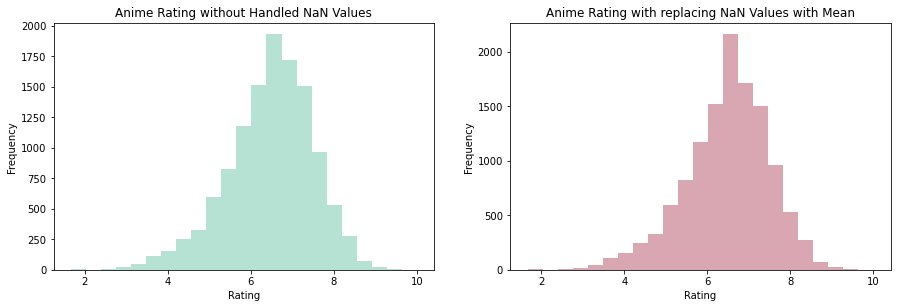

In [8]:
# replacing rating NaN with mean

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1) 
anime_df["rating"].plot(kind="hist", bins=23, color="#B6E2D3",title="Anime Rating without Handled NaN Values")
plt.xlabel("Rating");

rating_mean = anime_df["rating"].mean()
anime_df["rating"] = anime_df["rating"].fillna(rating_mean)

plt.subplot(2, 2, 2) 
anime_df["rating"].plot(kind="hist", bins=23, color="#D8A7B1", title="Anime Rating with replacing NaN Values with Mean")
plt.xlabel("Rating");

In [9]:
# replace unkown with NaN
anime_df=anime_df.replace({'Unknown':np.nan, 'unknown':np.nan})


In [10]:
# replacing episode NaN with mode and converting to int

anime_df['episodes'].fillna(anime_df['episodes'].mode()[0], inplace=True)
anime_df["episodes"]=anime_df["episodes"].astype(int)

In [11]:
# round the ratings for easier plotting
anime_df['rating_round'] = round(anime_df['rating'])
# convert type to str because it caused issues in the plots below
anime_df['type']=anime_df['type'].astype(str)

### <span style="color:#EF7C8E">2) Objectives:</span>
#### <span style="color:#55BB99">1) JointGrid:</span>


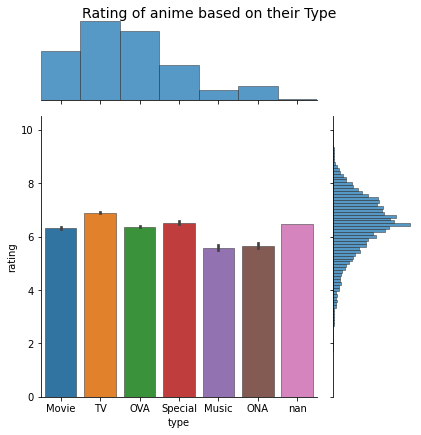

In [20]:
g = sns.JointGrid(
    data=anime_df, 
    x="type", 
    y="rating",
    ratio=3
)

g.plot(
    sns.barplot, # main plot
    sns.histplot, # joint plots 
    edgecolor="0.2", # edgecolor of bars
    linewidth=0.5 # linewidth of bars
)
g.fig.suptitle("Rating of anime based on their Type", y =1, size=14);

<span style="color:#55BB99">Insights: </span>
* 'TV' followed by 'Special type' and then 'Movies' and 'OVA' have the highest rating. 
* The rating has a normal distribution. 
* Even though there are less 'Special type' than 'OVA' and 'Movies' they tend to have a slighly higher rating. 


#### <span style="color:#55BB99">2) Contour Plot:</span>

C:\Users\wejda\anaconda3\lib\site-packages\seaborn\distributions.py:1078: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


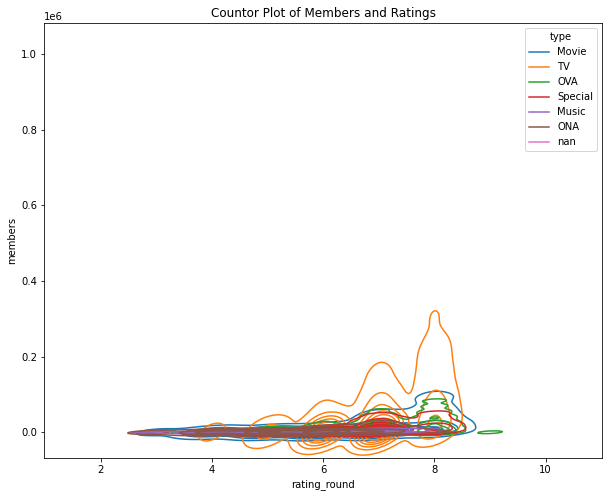

In [16]:
# Draw a contour plot to represent each bivariate density
# Less density as we move out farther from each species sensor
plt.figure(figsize=(10,8))

sns.kdeplot(
    data=anime_df,
    x="rating_round",
    y="members",
    hue="type"
)
plt.title("Countor Plot of Members and Ratings");

<span style="color:#55BB99">Insights: </span>
* Tv has the highest number of members. 
* The members all share the same interest in all types except for a subset of the ones only interested in TV as we can see from the orange line. 


#### <span style="color:#55BB99">3) Heatmap:</span>

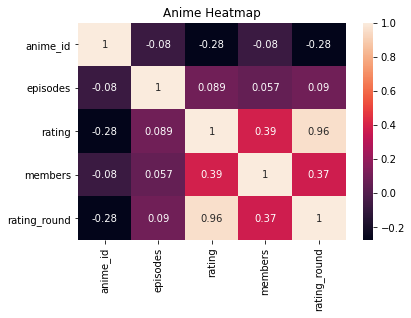

In [14]:
corr_m = anime_df.corr() # Create correlation matrix

sns.heatmap(
    corr_m, 
    annot=True # annotate the heat map
)

plt.title("Anime Heatmap");

<span style="color:#55BB99">Insights: </span>
* The highest correlation is between rating and members, I excluded between rating and rating_round since rating_round is the rounded values of the rating column. 


#### <span style="color:#55BB99">4) FacetGrid:</span>


C:\Users\wejda\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


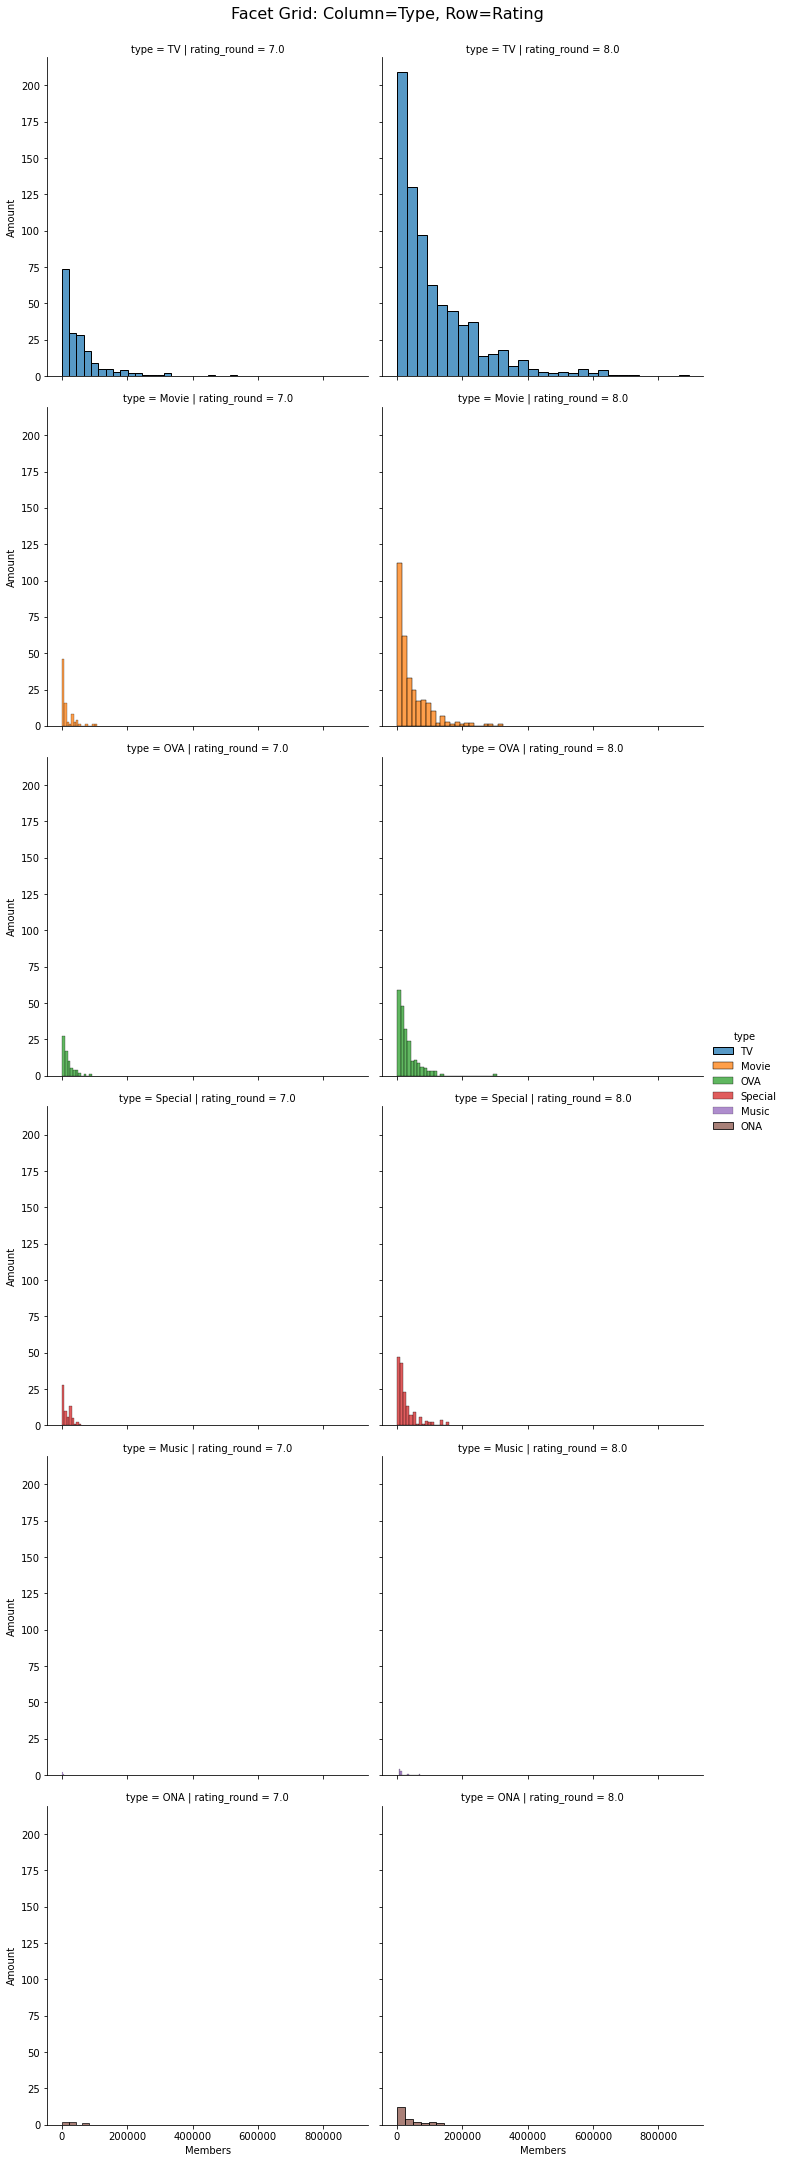

In [15]:
two_k = anime_df[:2000]
# Setup Grid
g = sns.FacetGrid(
    two_k[(two_k['rating_round']>=6)&(two_k['rating_round']<=8)], # ONLY USE FIRST 20 ROWS, this will help 
    row="type", # column for facet grid
    col="rating_round", # THIS IS A CONTINUOUS VALUE
    hue="type" # color the points 
    ,size=5
)

# Map a plot over each grid space
g.map_dataframe(
    sns.histplot, # map a scatter plot on each grid space
    x="members", # x axis value

)

g.set_axis_labels("Members", "Amount") # Rename axis labels
g.fig.suptitle('Facet Grid: Column=Type, Row=Rating', size=16, y=1)  # Set title for FaceGrid
g.fig.tight_layout() # Adjust spacing
g.add_legend() # Add legend

<span style="color:#55BB99">Insights: </span>
* Rating 8 has higher members than rating 7, which would make sense since the more members the more they will vote for their favorite anime so the higher the rating
* TV, Movie, OVA, Special are the most popular types of anime respectively. 